In [19]:
%pylab inline 
import cv2, time
import dlib
from PIL import Image

Populating the interactive namespace from numpy and matplotlib


In [20]:
from dlib_utils import extract_left_eye_center, extract_right_eye_center, get_rotation_matrix, crop_image

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [93]:
img = cv2.cvtColor(cv2.imread('./data/bradpit.jpg'), cv2.COLOR_BGR2RGB)

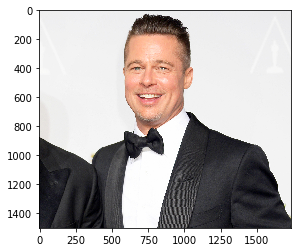

In [94]:
plt.imshow(img)

In [95]:
img.shape

(1500, 1737, 3)

In [96]:
s_height, s_width = img.shape[:2]

In [100]:
dets = detector(img, 1)

In [101]:
for i, det in enumerate(dets):
    if i>0: 
        print("multiple faces")

2.8195300243351085


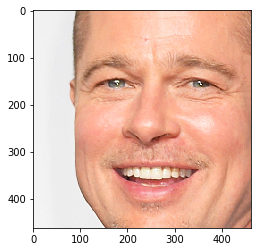

In [108]:
tic = time.clock()


dets = detector(img, 1)

for i, det in enumerate(dets):
    shape = predictor(img, det)
    left_eye = extract_left_eye_center(shape)
    right_eye = extract_right_eye_center(shape)
    M = get_rotation_matrix(left_eye, right_eye)
    rotated = cv2.warpAffine(img, M, (s_width, s_height), flags=cv2.INTER_CUBIC)
    aligned_face = crop_image(rotated, det)
    break


toc = time.clock()
print(toc - tic)

plt.imshow(aligned_face)

In [103]:
type(aligned_face)

numpy.ndarray

In [104]:
aligned_face.shape

(462, 462, 3)

In [105]:
# aligned_face = cv2.resize(aligned_face, (160,160)) #.reshape((1,160,160,3))

2.9722205755474533


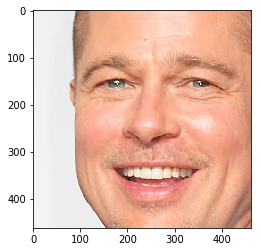

In [106]:
#Normal cropped face
tic = time.clock()

def detect_face(image):
    face_detector = dlib.get_frontal_face_detector()
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]
    return face_frames

detected_face = detect_face(img)
for n, face_rect in enumerate(detected_face):
    face = Image.fromarray(img).crop(face_rect)
    break
    

toc = time.clock()
print(toc - tic)

plt.imshow(face)

0.07052051494565603

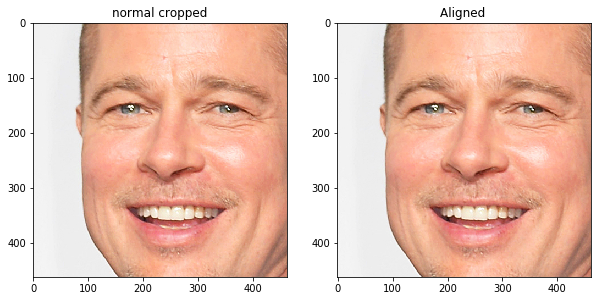

In [109]:
# plt.imshow(aligned)
tic = time.clock()
plt.figure(figsize=(10,10))

plt.subplot(1, 2, 2)
plt.imshow(aligned_face)
plt.title("Aligned ")


plt.subplot(1, 2, 1)
plt.imshow(face)
plt.title("normal cropped")

toc = time.clock()
toc - tic